In [1]:
import Resolvers._
interp.resolvers() = interp.resolvers() :+ Resolver.Http(
    "cibotech",
    "https://dl.bintray.com/cibotech/public/",
    MavenPattern,
    true
)

import Resolvers._


In [2]:
import $ivy.`com.cibo::evilplot:0.4.1`
import $ivy.`com.cibo::evilplot-repl:0.4.1`
import $ivy.`org.ruivieira::pf:0.0.1-SNAPSHOT`

Downloaded https://repo1.maven.org/maven2/org/scalanlp/breeze_2.11/0.13/breeze_2.11-0.13.jar.sha1
Downloaded https://repo1.maven.org/maven2/org/scalanlp/breeze-macros_2.11/0.13/breeze-macros_2.11-0.13.jar
Downloaded https://repo1.maven.org/maven2/org/scalanlp/breeze-macros_2.11/0.13/breeze-macros_2.11-0.13.jar.sha1
https://repo1.maven.org/maven2/org/scalanlp/breeze_2.11/0.13/b… (40.95 %, 61816…

https://repo1.maven.org/maven2/org/scalanlp/breeze_2.11/0.13/b… (70.25 %, 10605…

https://repo1.maven.org/maven2/org/scalanlp/breeze_2.11/0.13/b… (99.56 %, 15029…

Downloaded https://repo1.maven.org/maven2/org/scalanlp/breeze_2.11/0.13/breeze_2.11-0.13.jar


import $ivy.$                         

import $ivy.$                              

import $ivy.$                                 

In [3]:
import breeze.stats.distributions.Gaussian

def transition(state: Double) : Double = new Gaussian(state, 2.0).draw()

def likelihood(prior: Double, state: Double) : Double = new Gaussian(prior, 1.0).pdf(state)

import breeze.stats.distributions.Gaussian


defined function transition
defined function likelihood

In [4]:
val states = new Array[Double](1000)
states(0) = 0.0
val ys = new Array[Double](1000)
(1 until 1000).foreach { i =>
  states(i) = transition(states(i - 1))
  ys(i) =  new Gaussian(states(i), 1.0).draw()
}

states: Array[Double] = Array(
  0.0,
  -0.9834205668350445,
  1.8686072266182916,
  -1.805418789541096,
  -1.1406700059624075,
  -0.8557255395953632,
  1.2054403249964616,
  4.513036200559537,
  1.8667605852381013,
  -0.06993985615904785,
  -0.5047952710606065,
...
ys: Array[Double] = Array(
  0.0,
  -1.362909504753242,
  2.9748363603006354,
  -1.8580718640856488,
  -3.1808486147348676,
  -0.7392448109802507,
  1.8534611825464273,
  5.513932495283473,
  0.9049967514367679,
  -0.4685607419648799,
  -1.5828614857427232,
...

In [5]:
import org.ruivieira.pf.SIR

val sir = new SIR[Double, Double](transition, likelihood)

import org.ruivieira.pf.SIR


sir: org.ruivieira.pf.SIR[Double, Double] = org.ruivieira.pf.SIR@4d8bbec5

In [6]:
val filtered = new Array[Double](1000)
var particles = Vector.fill[Double](1000)(new Gaussian(0.0, 10.0).draw())
(0 until 1000).foreach { i =>
  val newParticles = sir.filter(particles, ys(i))
  filtered(i) = newParticles.sum / 1000.0
  particles = newParticles
}

filtered: Array[Double] = Array(
  0.15625678552048844,
  -1.1261506127585201,
  2.1635453949291485,
  -1.0935466748266598,
  -2.885512914150671,
  -1.0375693295521855,
  1.3669897174384298,
  4.712613052790139,
  1.5118210429955787,
  -0.09400556462802157,
  -1.3394787038874025,
...
particles: Vector[Double] = Vector(
  21.56465698775959,
  22.458604155880806,
  20.48831472771391,
  20.77650276276058,
  20.261964152111375,
  21.585948726689395,
  20.62723462718529,
  19.076399981784725,
  20.715630836069856,
  20.203584715875262,
  19.934737204463744,
...

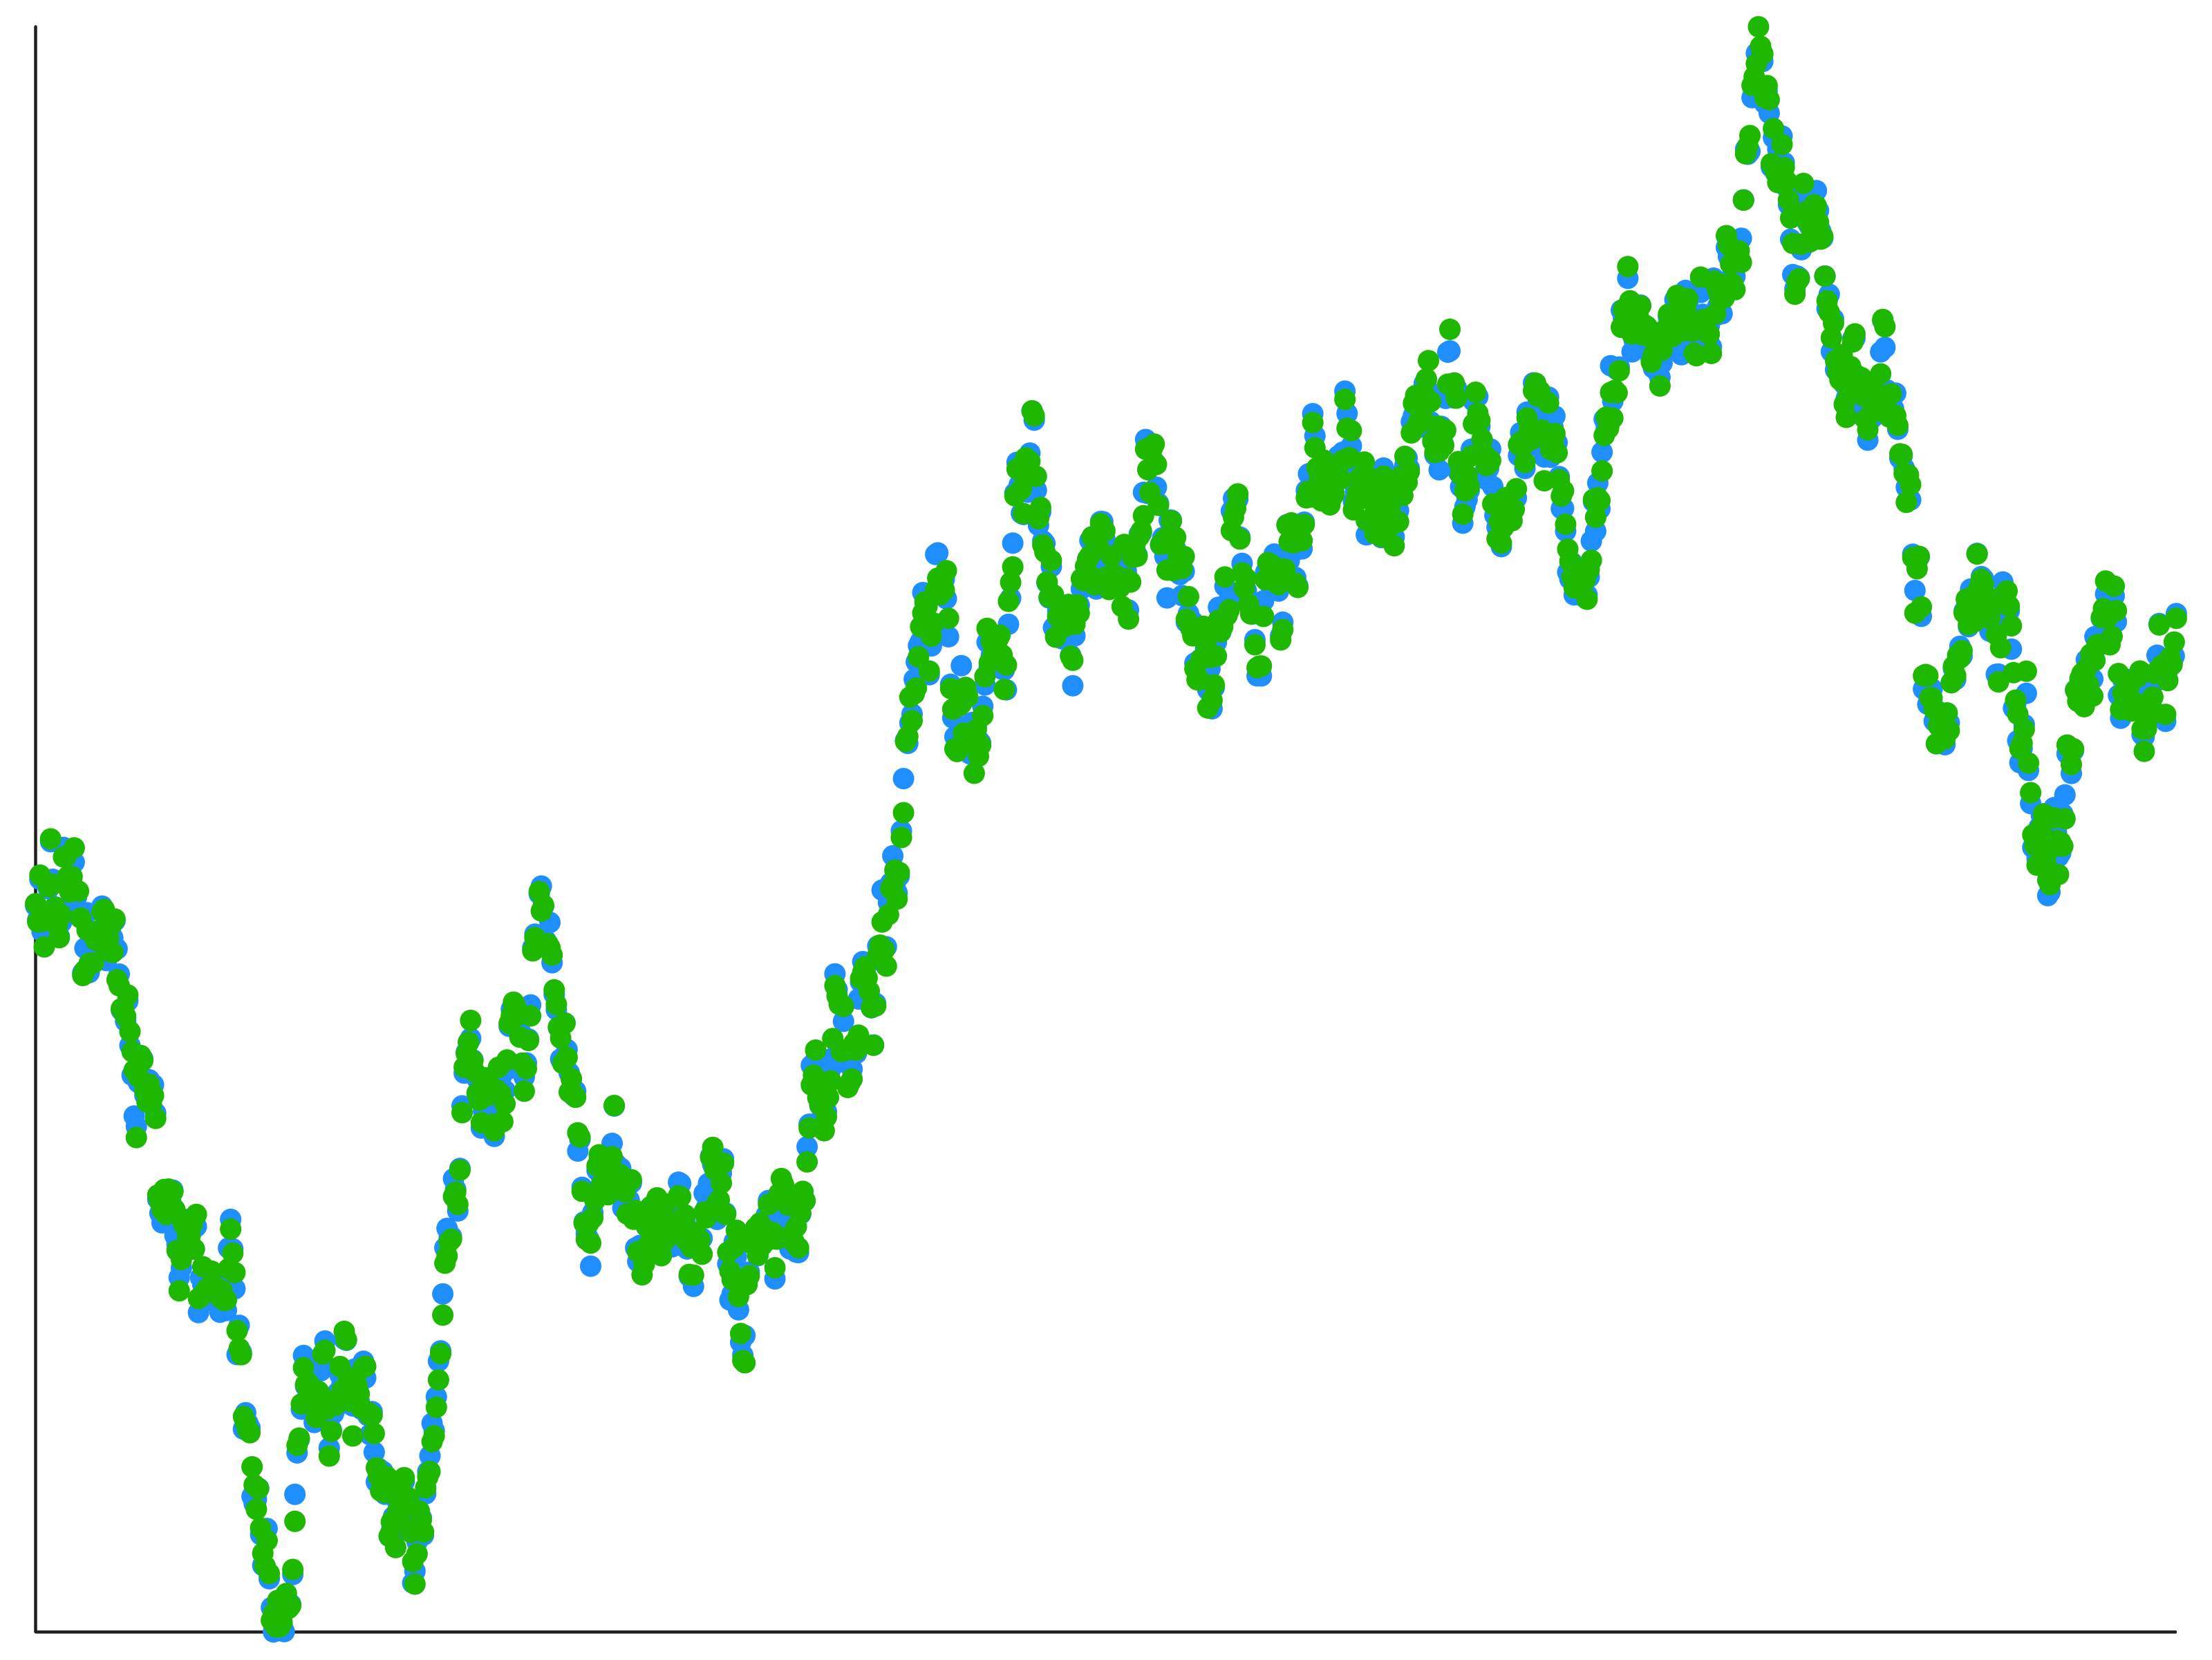

import com.cibo.evilplot._

import com.cibo.evilplot.plot._

import com.cibo.evilplot.colors.HSL

import com.cibo.evilplot.numeric.Point

import com.cibo.evilplot.plot.ScatterPlot

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._


data: Seq[com.cibo.evilplot.numeric.package.Point] = List(
  Point(0.0, 0.0),
  Point(1.0, -0.9834205668350445),
  Point(2.0, 1.8686072266182916),
  Point(3.0, -1.805418789541096),
  Point(4.0, -1.1406700059624075),
  Point(5.0, -0.8557255395953632),
  Point(6.0, 1.2054403249964616),
  Point(7.0, 4.513036200559537),
  Point(8.0, 1.8667605852381013),
  Point(9.0, -0.06993985615904785),
  Point(10.0, -0.5047952710606065),
...
estimated: Seq[com.cibo.evilplot.numeric.package.Point] = List(
  Point(0.0, 0.15625678552048844),
  Point(1.0, -1.1261506127585201),
  Point(2.0, 2.1635453949291485),
  Point(3.0, -1.0935466748266598),
  Point(4.0, -2.885512914150671),
  Point(5.0, -1.0375693295521855),
  Point(6.0, 1.3669897174384298),
  Point(7.0, 4.712613052790

In [7]:
import com.cibo.evilplot._
import com.cibo.evilplot.plot._
import com.cibo.evilplot.colors.HSL
import com.cibo.evilplot.numeric.Point
import com.cibo.evilplot.plot.ScatterPlot
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

val data = Seq.tabulate(1000) { i =>
  Point(i.toDouble, states(i))
}
val estimated = Seq.tabulate(1000) { i =>
  Point(i.toDouble, filtered(i))
}

val plot = ScatterPlot.series(data, "Line graph", HSL(210, 100, 56))
.overlay(ScatterPlot.series(estimated, "Line graph", HSL(110, 100, 36)))
.frame().render()

publish.png(plot.asBufferedImage)